# Data mungling with pandas

_Adapted from original materials by [manishamde](https://github.com/manishamde)._

Data munging or data wrangling is loosely the process of manually converting or mapping data from one 
"raw" form into another format that allows for more convenient consumption of the data with the help of 
semi-automated tools.

Data munging is basically the hip term for cleaning up a messy data set.

Data munging involves common operations such as: 
 - Indexing
 - Renaming
 - Handling missing values
 - map(), apply(), applymap()
 - New Columns = f(Existing Columns)
 - Basic stats
 - Merge, join
 - Plots

In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We'll try the above operations on a very simple dataframe

In [2]:
def defdf():
    df = pd.DataFrame({'int_col' : [1, 2, 6, 8, -1], 
                   'float_col' : [0.1, 0.2, 0.2, 10.1, None], 
                   'str_col' : ['a', 'b', None, 'c', 'a']})
    return df

df = defdf()
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


## Indexing

### Selecting a subset of columns
 * Select only the float and string columns of the dataframe

In [3]:
df[['float_col', 'int_col']]

,float_col,int_col
0,0.1,1
1,0.2,2
2,0.2,6
3,10.1,8
4,NaN,-1


### Conditional indexing
 * Using boolean indexing, select the rows of the dataframe for which float column is larger than 0.15
 * Select the rows for which float column is larger than 0.1 and integer column is larger than 2. Change 'and' by 'or' 
 * Select the rows for which string column is not 'a'

In [4]:
df[df.float_col>0.15]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


In [5]:
df[(df.float_col>0.1) & (df.int_col>2)]

,float_col,int_col,str_col
2,0.2,6,None
3,10.1,8,c


In [6]:
df[(df.float_col>0.1) | (df.int_col>2)]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


In [7]:
df[~(df.str_col=='a')]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


## Renaming

 * Use the rename method to rename all three columns
 * Set inplace=True for the changes to affect the existing dataframe

In [8]:
df.rename(columns={'float_col': 'FLO', 'int_col': 'INT', 'str_col': 'STR'})

,FLO,INT,STR
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [9]:
df.rename(columns={'float_col': 'FLO', 'int_col': 'INT', 'str_col': 'STR'}, inplace=True)
df

,FLO,INT,STR
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [10]:
df = defdf()

## Handling missing values

### Drop missing values

 * Use dropna to drop all rows with missing data (NaN). From now on, perform the rest of the exercises on this modified dataframe.

In [11]:
df.dropna()

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
3,10.1,8,c


### Fill missing values
 * Use fillna to fill missing data. Fill float column with mean of column and string column with a character of your choosing. Use inplace to alter the value in the original dataframe.

In [12]:
mean_float = df.float_col.mean()
df.float_col.fillna(mean_float, inplace=True)
df.str_col.fillna('fill', inplace=True)
df

,float_col,int_col,str_col
0,0.10,1,a
1,0.20,2,b
2,0.20,6,fill
3,10.10,8,c
4,2.65,-1,a


In [13]:
def filldf():
    df = defdf()
    df.float_col.fillna(mean_float, inplace=True)
    df.str_col.fillna('fill', inplace=True)
    return df

In [14]:
df = filldf()

## Vectorized operations: map, apply
### map
The map operation maps the values of a series iterating over each element
 * Use map to generate a series that equals each element of integer column squared

In [15]:
df['int_col'].map(lambda i: i*i)

0     1
1     4
2    36
3    64
4     1
Name: int_col, dtype: int64

### apply
The apply operation applies a function along any axis of the dataframe. 
 - axis=0: apply function to each column
 - axis=1: apply function to each row
Depending on the return type of the function passed to apply(), the result will either be of lower dimension or the same dimension.


 * Use apply on columns to compute the square root of the float and integer columns
 * Use apply on rows to compute the cumulative sum by rows of the elements of the float and integer columns

In [16]:
df[['float_col', 'int_col']].apply(np.sqrt)

,float_col,int_col
0,0.316228,1.000000
1,0.447214,1.414214
2,0.447214,2.449490
3,3.178050,2.828427
4,1.627882,NaN


In [17]:
df[['float_col', 'int_col']].apply(np.cumsum, axis=1)

,float_col,int_col
0,0.10,1.10
1,0.20,2.20
2,0.20,6.20
3,10.10,18.10
4,2.65,1.65


### applymap
The applymap operation applies a function to a dataframe that is intended to operate elementwise

 * Use applymap to transform the dataframe in the following manner: duplicate elements of type string ('z' -> 'zz') and compute the exponential of numerical elements. Hint: define first the function fn that needs to be applied.

In [18]:
def fn(x): 
    if isinstance(x, str):
        return x*2
    else:
        return np.exp(x)

df.applymap(fn)

,float_col,int_col,str_col
0,1.105171,2.718282,aa
1,1.221403,7.389056,bb
2,1.221403,403.428793,fillfill
3,24343.009424,2980.957987,cc
4,14.154039,0.367879,aa


## New Columns = f(Existing Columns)

Generating new columns from existing columns in a data frame is an integral part of the data mungling workflow. 

### multiple columns as a function of a single column

 * Use map in combination with zip to construct two new columns being the square and third power of the integer column. [Help](http://stackoverflow.com/questions/12356501/pandas-create-two-new-columns-in-a-dataframe-with-values-calculated-from-a-pre)

In [19]:
def pow23(x): 
    return x**2, x**3

df['int**2'], df['int**3'] = zip(*df['int_col'].map(pow23))
df

,float_col,int_col,str_col,int**2,int**3
0,0.10,1,a,1,1
1,0.20,2,b,4,8
2,0.20,6,fill,36,216
3,10.10,8,c,64,512
4,2.65,-1,a,1,-1


In [20]:
df = filldf()

### single column as a function of multiple columns

 * Use apply to construct a new column product of the float and integer columns. [Help](http://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe?lq=1)
 * Use apply to construct a new column composed of the concatenation of the string column and the integer column cast to string

In [21]:
df['sum_float_int'] = df.apply(lambda d: d['float_col'] * d['int_col'], axis=1)
df

,float_col,int_col,str_col,sum_float_int
0,0.10,1,a,0.10
1,0.20,2,b,0.40
2,0.20,6,fill,1.20
3,10.10,8,c,80.80
4,2.65,-1,a,-2.65


In [22]:
df = filldf()

In [23]:
df['concat_int_str'] = df.apply(lambda d: str(d['int_col']) + d['str_col'], axis=1)
df

,float_col,int_col,str_col,concat_int_str
0,0.10,1,a,1a
1,0.20,2,b,2b
2,0.20,6,fill,6fill
3,10.10,8,c,8c
4,2.65,-1,a,-1a


In [24]:
df = filldf()

### multiple columns as a function of multiple columns

 * Use apply and a function that returns a Series to construct two new columns being the square root of the float and integer columns. [Help](http://stackoverflow.com/questions/10751127/returning-multiple-values-from-pandas-apply-on-a-dataframe)

In [25]:
def int_float_squares(series):
   return pd.Series({'int_sq' : series['int_col']**2, 'flt_sq' : series['float_col']**2})
   
df[['int_sq', 'flt_sq']] = df.apply(int_float_squares, axis = 1)
df

,float_col,int_col,str_col,int_sq,flt_sq
0,0.10,1,a,0.0100,1
1,0.20,2,b,0.0400,4
2,0.20,6,fill,0.0400,36
3,10.10,8,c,102.0100,64
4,2.65,-1,a,7.0225,1


In [26]:
df = filldf()

## Basic stats

### describe

 * Use describe to gather information on the distribution of the float and integer columns.
 * Use boxplot for a visual representation of the same information

In [27]:
df[['float_col', 'int_col']].describe()

,float_col,int_col
count,5.000000,5.000000
mean,2.650000,3.200000
std,4.301453,3.701351
min,0.100000,-1.000000
25%,0.200000,1.000000
50%,0.200000,2.000000
75%,2.650000,6.000000
max,10.100000,8.000000


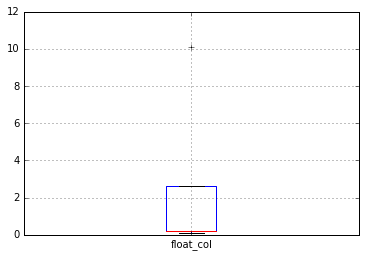

In [28]:
df.boxplot(column='float_col', return_type='axes')

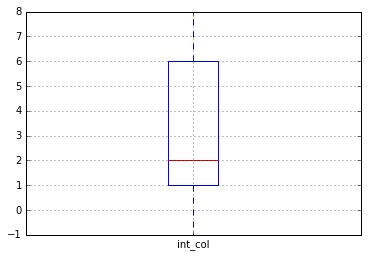

In [29]:
df.boxplot(column='int_col', return_type='axes')

## Merge and Join

Pandas supports database-like joins which makes it easy to link data frames.

 * Perform inner, outer, left and right joins of the dataframe with the second dataframe defined below, using the common key 'str_col' as key

In [30]:
df2 = pd.DataFrame({'str_col' : ['a','b'], 'int_col_2' : [1, 2]})
df2

,int_col_2,str_col
0,1,a
1,2,b


In [31]:
pd.merge(df, df2, on='str_col', how='inner')

,float_col,int_col,str_col,int_col_2
0,0.10,1,a,1
1,2.65,-1,a,1
2,0.20,2,b,2


In [32]:
pd.merge(df, df2, on='str_col', how='outer')

,float_col,int_col,str_col,int_col_2
0,0.10,1,a,1
1,2.65,-1,a,1
2,0.20,2,b,2
3,0.20,6,fill,NaN
4,10.10,8,c,NaN


In [33]:
pd.merge(df, df2, on='str_col', how='left')

,float_col,int_col,str_col,int_col_2
0,0.10,1,a,1
1,0.20,2,b,2
2,0.20,6,fill,NaN
3,10.10,8,c,NaN
4,2.65,-1,a,1


In [34]:
pd.merge(df, df2, on='str_col', how='right')

,float_col,int_col,str_col,int_col_2
0,0.10,1,a,1
1,2.65,-1,a,1
2,0.20,2,b,2


## Plot

Pandas is equiped with straightforward wrappers for quick plotting of data

 * Use plot to visualize the columns of the dataframe defined below
 * Use hist to visualize the distribution of the data in the form of a histogram

In [35]:
plot_df = pd.DataFrame(np.random.randn(1000,2),columns=['x','y'])
plot_df['y'] = plot_df['y'].map(lambda x : x + 1)
plot_df.head()

,x,y
0,-0.862863,-0.150650
1,-0.019300,1.669627
2,-0.196366,2.062641
3,0.620009,1.143993
4,0.458392,0.506314


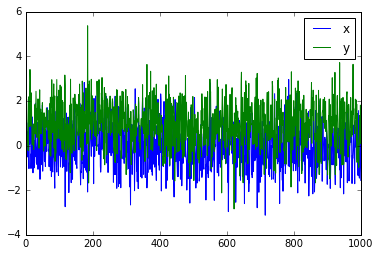

In [36]:
plot_df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b58de10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b7ee450>]], dtype=object)

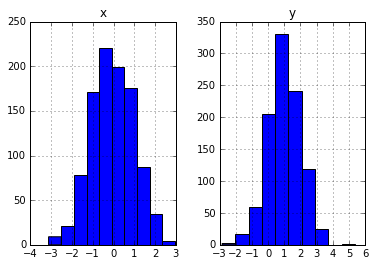

In [37]:
plot_df.hist()